<a href="https://colab.research.google.com/github/mananjain0220/ML-and-Computer-Vision/blob/main/Inception_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/damage_processing_dataset/

/content/gdrive/MyDrive/damage_processing_dataset


In [ ]:
!ls

path_to_my_model.h5  Training  Validation


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from glob import glob
from keras.applications.resnet import ResNet50, preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D


In [ ]:
train_path = '/content/gdrive/MyDrive/damage_processing_dataset/Training/'
validate_path = '/content/gdrive/MyDrive/damage_processing_dataset/Validation/'

In [ ]:
#to get number of files

image_files = glob(train_path+ '/*/*.jp*g')
valid_image_files = glob(validate_path+ '/*/*.jp*g')

In [ ]:
# to get number of classes

folders = glob(train_path+ '/*')

In [ ]:
# Define the batch size and target image size (VGG16 default is 224x224)
batch_size = 32
image_size = [224, 224]

# Data augmentation and rescaling for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Only rescaling for validation data
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_path,  # This is the source directory for training images
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary')  # 'binary' since we use binary_crossentropy loss

# Flow validation images in batches using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    validate_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary')


Found 479 images belonging to 2 classes.
Found 151 images belonging to 2 classes.


In [ ]:
inception = inception_block(base_model.output, 32)  # You can adjust the number of filters


In [ ]:

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, concatenate

def inception_block(previous_layer, filters):
    # 1x1 conv
    conv1 = Conv2D(filters, (1,1), padding='same', activation='relu')(previous_layer)

    # 3x3 conv
    conv3 = Conv2D(filters, (3,3), padding='same', activation='relu')(previous_layer)

    # 5x5 conv
    conv5 = Conv2D(filters, (5,5), padding='same', activation='relu')(previous_layer)

    # 3x3 max pooling
    pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(previous_layer)

    # concatenate filters
    layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
    return layer_out


In [ ]:
# Create a new top layer (head)
# Continue with additional layers
x = GlobalAveragePooling2D()(inception)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(folders)-1, activation='sigmoid')(x)  # Use sigmoid for binary classification

In [ ]:
# Combine base model with the new head
model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
#gives structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
# Early stopping
#from keras.callbacks import EarlyStopping

# Define the early stopping callback
#early_stopping = EarlyStopping(
#    monitor='val_loss',  # Monitor the validation loss
#    patience=5,         # Number of epochs with no improvement after which training will be stopped
#    verbose=1,          # Verbosity mode
#    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
#)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=18)  # You can adjust the number of epochs


Epoch 1/18
14/14 [==============================] - 123s 8s/step - loss: 1.5986 - accuracy: 0.5011 - val_loss: 0.3947 - val_accuracy: 0.8359
Epoch 2/18
14/14 [==============================] - 22s 2s/step - loss: 0.5227 - accuracy: 0.7589 - val_loss: 0.4992 - val_accuracy: 0.7500
Epoch 3/18
14/14 [==============================] - 23s 2s/step - loss: 0.3776 - accuracy: 0.8456 - val_loss: 0.3710 - val_accuracy: 0.8359
Epoch 4/18
14/14 [==============================] - 22s 2s/step - loss: 0.3370 - accuracy: 0.8613 - val_loss: 0.3467 - val_accuracy: 0.8516
Epoch 5/18
14/14 [==============================] - 21s 2s/step - loss: 0.3056 - accuracy: 0.8881 - val_loss: 0.3493 - val_accuracy: 0.8516
Epoch 6/18
14/14 [==============================] - 22s 2s/step - loss: 0.2966 - accuracy: 0.8591 - val_loss: 0.3548 - val_accuracy: 0.8359
Epoch 7/18
14/14 [==============================] - 22s 2s/step - loss: 0.3080 - accuracy: 0.8638 - val_loss: 0.3493 - val_accuracy: 0.8359
Epoch 8/18
14/14 [=

In [ ]:
# Save the entire model to a HDF5 file.
model.save('/content/gdrive/MyDrive/testing_and_saved_model/Resnet+Inception_model.keras')

# You can replace 'path_to_my_model.h5' with the desired path and file name for your model.


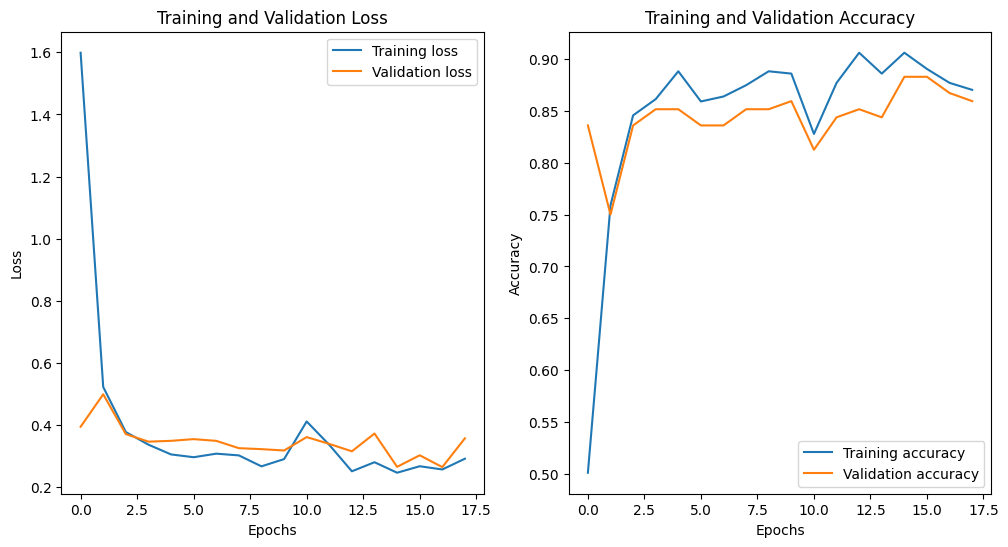

In [ ]:
import matplotlib.pyplot as plt

# Plot the training history
history_dict = history.history

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training loss')
plt.plot(history_dict['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Training accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
%cd /content/gdrive/MyDrive/testing_and_saved_model/Resnet_model.keras

[Errno 20] Not a directory: '/content/gdrive/MyDrive/testing_and_saved_model/Resnet_model.keras'
/content/gdrive/MyDrive/damage_processing_dataset


In [ ]:
!ls

path_to_my_model.h5  Training  Validation


In [ ]:
from keras.models import load_model

# Load the model
loaded_model = load_model('/content/gdrive/MyDrive/testing_and_saved_model/Resnet+Inception_model.keras')

# Now you can use `loaded_model` to make predictions, continue training, etc.


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
import os



In [ ]:
def load_and_preprocess_images(folder_path):
    images = []
    image_names = []

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        try:
            # Load the image (using the target size for your model, e.g., 224x224 for VGG16)
            img = load_img(img_path, target_size=(224, 224))

            # Convert the image to an array
            img_array = img_to_array(img)

            # Preprocess the image for your model
            img_array = preprocess_input(img_array)

            # Append to your list
            images.append(img_array)
            image_names.append(img_name)
        except Exception as e:
            print(f"Warning: Could not process image file {img_name} - {e}")

    # Convert the list of images to a batch of size (n_images, 224, 224, 3)
    images_batch = np.array(images)
    return images_batch, image_names

folder_path = '/content/gdrive/MyDrive/testing_and_saved_model/testing_images/'  # Update with the path to your images
images_batch, image_names = load_and_preprocess_images(folder_path)



In [ ]:
# Make predictions
predictions = model.predict(images_batch)

# If needed, convert these predictions to labels
# For binary classification with a sigmoid output layer:
predicted_classes = (predictions > 0.5).astype(int)

# For multi-class classification with a softmax output layer:
# predicted_classes = np.argmax(predictions, axis=1)


1/1 [==============================] - 2s 2s/step


In [ ]:
s#"0": images without the object (or "no object").
#"1": images with the object.

for i, name in enumerate(image_names):
    print(f"Image: {name}, Predicted class: {predicted_classes[i]}")


Image: image1.jpeg, Predicted class: [1]
Image: image14.jpeg, Predicted class: [1]
Image: image13.jpeg, Predicted class: [1]
Image: image18.png, Predicted class: [1]
Image: image10.jpeg, Predicted class: [1]
Image: image4.jpeg, Predicted class: [1]
Image: image15.jpeg, Predicted class: [1]
Image: image9.jpeg, Predicted class: [1]
Image: image2.jpg, Predicted class: [1]
Image: image11.jpeg, Predicted class: [1]
Image: image16.jpeg, Predicted class: [1]
Image: image17.jpeg, Predicted class: [1]
Image: image3.jpeg, Predicted class: [1]
Image: image5.png, Predicted class: [1]
Image: image6.png, Predicted class: [1]
Image: image7.jpeg, Predicted class: [1]
Image: image12.png, Predicted class: [1]
Image: image19.jpeg, Predicted class: [1]
Image: image8.jpeg, Predicted class: [1]
Image: image20.png, Predicted class: [1]
